In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [2]:
heart = pd.read_csv('heart.csv')
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
heart.describe()
# This data set is quite small with 918 entries

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


**Comment:** Most of the FastingBS entries are 0. The maximum heart rate ranges from 60 to 202 with the mean of 138. The cholesterol level also has a very wide range from 0 to 603 with the mean of 223

### Data Visualization

<AxesSubplot:xlabel='HeartDisease', ylabel='MaxHR'>

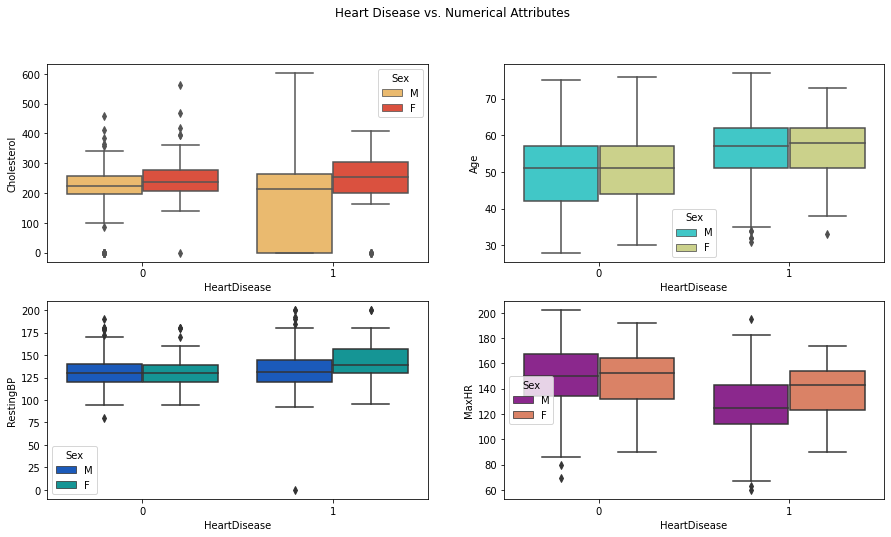

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
fig.suptitle('Heart Disease vs. Numerical Attributes')
sns.boxplot(x='HeartDisease', y='Cholesterol', hue='Sex', data=heart, ax=axes[0, 0], palette='YlOrRd')
sns.boxplot(x='HeartDisease', y='Age', hue='Sex', data=heart, ax=axes[0, 1], palette='rainbow')
sns.boxplot(x='HeartDisease', y='RestingBP', hue='Sex', data=heart, ax=axes[1, 0], palette='winter')
sns.boxplot(x='HeartDisease', y='MaxHR', hue='Sex', data=heart, ax=axes[1, 1], palette='plasma')

**Comment:** The cholesterol level of male group has a wider range compared to the female one. However, the median value of cholesterol in female group is slightly higher than male. The median of age shows some difference between non-heart disease and heart disease which makes sense. The elder group has higher risk in having heart disease than the younger ones. In the heart disease vs. MaxHR graph, it appears that the median of female maximum heart rate is higher than male's in the heart disease group, but not much different compared to the non-disease one. However, the median of maximum heart rate in non-conditioned male is higher than heart-issue one

Text(0.5, 1.0, 'Count Plot for Chest Pain Type')

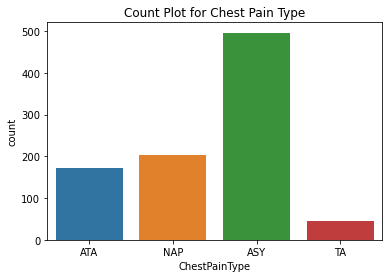

In [5]:
sns.countplot(x='ChestPainType', data=heart)
plt.title('Count Plot for Chest Pain Type')

### Data Processing

In [22]:
# Obtain the numerical and categorical variables and put them into list
num_var = heart.select_dtypes(exclude='object').columns.tolist()
cat_var = heart.select_dtypes(include='object').columns.tolist()

In [7]:
cat_var

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [8]:
# Observe how many unique categorical entries
uniq_cat = [heart[i].nunique() for i in cat_var]
dict(zip(cat_var, uniq_cat))

{'Sex': 2,
 'ChestPainType': 4,
 'RestingECG': 3,
 'ExerciseAngina': 2,
 'ST_Slope': 3}

*Converting categorical variables into numerics using OneHotEncoder*

In [9]:
from sklearn.preprocessing import OneHotEncoder

OHE = OneHotEncoder(handle_unknown='ignore', sparse=False)
catdf = pd.DataFrame(OHE.fit_transform(heart[cat_var]))
numdf = heart[num_var]

In [10]:
heartdf = pd.concat([numdf, catdf], axis=1)

In [11]:
heartdf

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,0,1,2,...,4,5,6,7,8,9,10,11,12,13
0,40,140,289,0,172,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,0,156,1.0,1,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,0,98,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,138,214,0,108,1.5,1,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,150,195,0,122,0.0,0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
914,68,144,193,1,141,3.4,1,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
915,57,130,131,0,115,1.2,1,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
916,57,130,236,0,174,0.0,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Building Models

**Logistic Regression Model**

In [12]:
from sklearn.model_selection import train_test_split

X = heartdf.drop('HeartDisease', axis=1)
y = heartdf['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(max_iter=500)
model1.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = model1.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87       112
           1       0.93      0.88      0.90       164

    accuracy                           0.89       276
   macro avg       0.88      0.89      0.88       276
weighted avg       0.89      0.89      0.89       276

[[101  11]
 [ 20 144]]


Text(0.5, 1.0, 'Confusion Matrix')

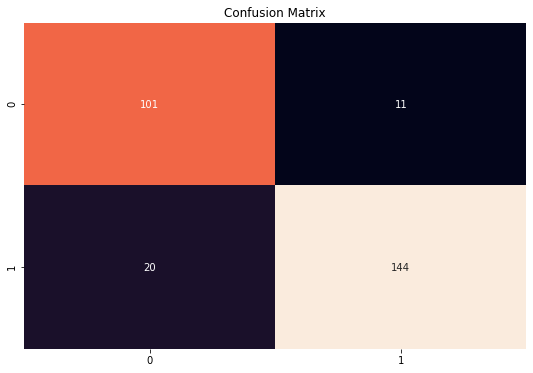

In [15]:
plt.figure(figsize=(9, 6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cbar=False, fmt='g')
plt.title('Confusion Matrix', )

**KNN model**

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Standarize the variable
sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

*Choosing k-value*

In [17]:
error_rate = []
for i in range(1, 15):
    model2 = KNeighborsClassifier(n_neighbors=i)
    model2.fit(X_train, y_train)
    predictions = model2.predict(X_test)
    error_rate.append(np.mean(predictions != y_test))

Text(0.5, 0, 'k-value')

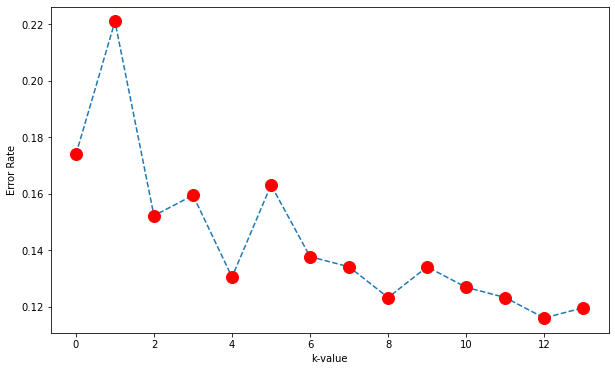

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(error_rate, ls='dashed', marker='o', mec='red', mfc='red', ms=12)
plt.ylabel('Error Rate')
plt.xlabel('k-value')

**Comment:** The k-value of 12 gives the lowest error rate

*Refitting the model using the chosen k-value*

In [19]:
model2 = KNeighborsClassifier(n_neighbors=12)
model2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [20]:
predictions = model2.predict(X_test)

In [21]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       112
           1       0.93      0.85      0.89       164

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.88      0.88       276

[[102  10]
 [ 24 140]]


### Conclusion

The Logistic Regression and KNN models perform as good as each other when they both have the accuracy of 0.89 and 0.88, respectively. The data set is quite small, which might cause the overfitting issue in the model